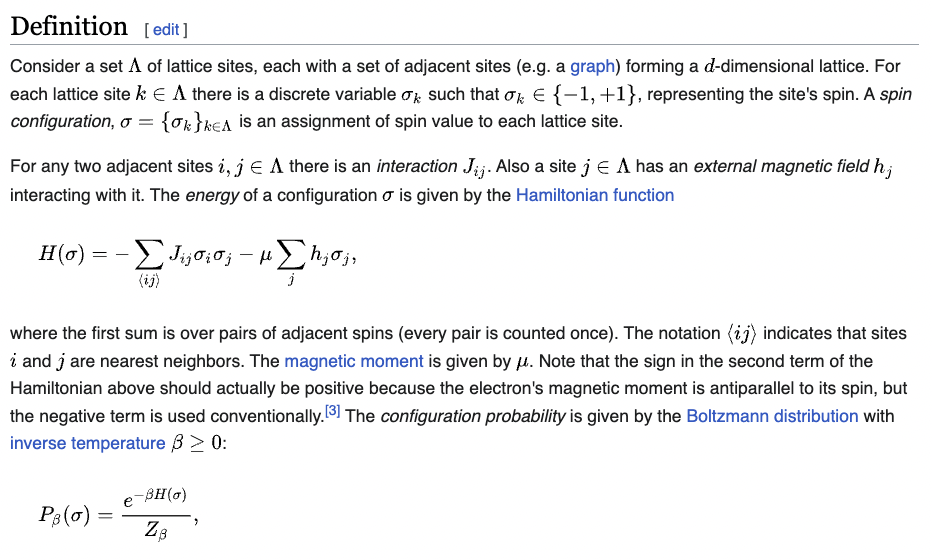

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython import display

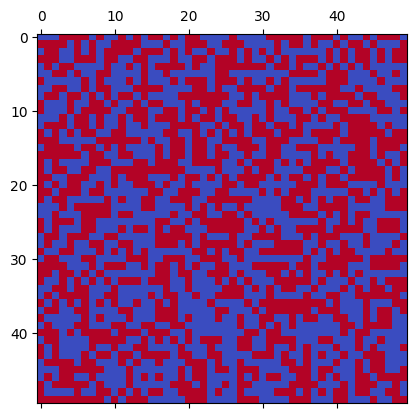

In [4]:
# Parameters
L = 50  # Lattice size
T = 2.5  # Temperature
J = 0  # Interaction strength
field = 0.0  # Field strength (to be varied)
num_steps = 5000  # Number of Monte Carlo steps

# Initialize nodes
node = np.random.choice([-1, 1], size=(L, L))

# Functions to calculate energy change for a spin flip
def delta_E(node, i, j):
    return 2*(J*node[i, j]*(node[(i+1) % L, j] +
                           node[(i-1) % L, j] +
                           node[i, (j+1) % L] +
                           node[i, (j-1) % L])
              + field*node[i, j])

# Metropolis Monte Carlo simulation
def update(frame):
    for _ in range(num_steps):
        i, j = np.random.randint(0, L, size=2)
        delta_E_ = delta_E(node, i, j)
        if np.random.rand() < np.exp(-delta_E_ / T):
            node[i, j] *= -1

    mat.set_data(node)
    return mat

# Initialize animation
fig, ax = plt.subplots()
mat = ax.matshow(node, cmap='coolwarm')
ani = animation.FuncAnimation(fig, update, interval=10, frames=100)

rc('animation', html='jshtml')
ani

#writervideo = animation.FFMpegWriter(fps=60)
#ani.save('animation.mp4', writer=writervideo)

#plt.show()

In [3]:
node

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])